In [1]:
%matplotlib inline
import pandas as pd
import seaborn; seaborn.set()
import matplotlib.pyplot as plt
import numpy as np

### 观察数据特征
1. 数据索引为时间(按小时计)
2. 单位时间东西道驶入自行车数量
3. 数据包含53280行，其中53271行有值
4. 时间跨度从2012年10月到2018年10月
5. 平均每天驶入自行车57(东)，54(西)辆

In [2]:
data = pd.read_csv('FremontBridge.csv', index_col='Date', parse_dates=True)
data.head()

,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,
2012-10-03 00:00:00,9.0,4.0
2012-10-03 01:00:00,6.0,4.0
2012-10-03 02:00:00,1.0,1.0
2012-10-03 03:00:00,3.0,2.0
2012-10-03 04:00:00,1.0,6.0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 53280 entries, 2012-10-03 00:00:00 to 2018-10-31 23:00:00
Data columns (total 2 columns):
Fremont Bridge East Sidewalk    53271 non-null float64
Fremont Bridge West Sidewalk    53271 non-null float64
dtypes: float64(2)
memory usage: 1.2 MB


In [4]:
data.dropna().describe()

,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
count,53271.000000,53271.000000
mean,57.434401,54.368549
std,82.795998,71.282743
min,0.000000,0.000000
25%,7.000000,7.000000
50%,29.000000,30.000000
75%,70.000000,72.000000
max,717.000000,698.000000


### 驶入自行车数与时间的关系
1. 可观察到每年年末车最少
2. 夏季自行车数量最多
3. 由东边驶入的自行车总体更多
4. 2017年后，自行车驶入数量增加


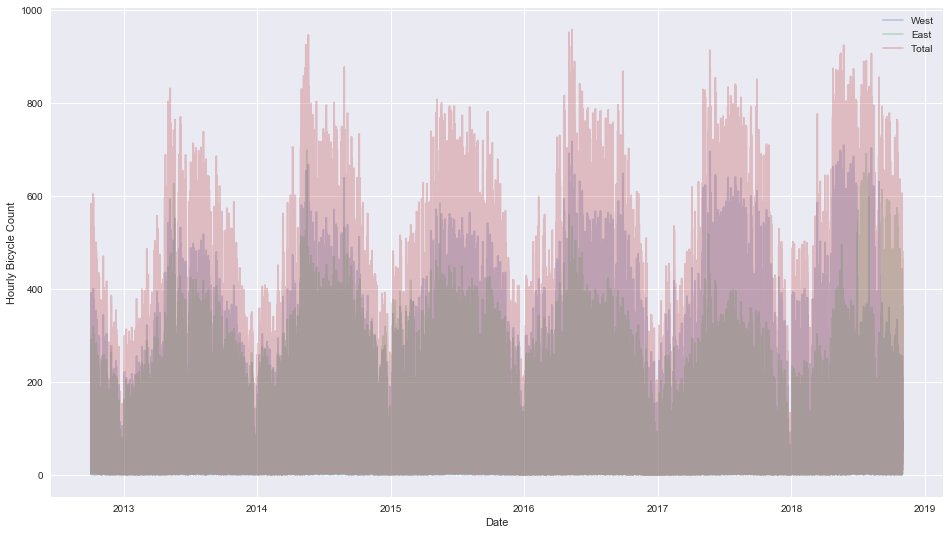

In [5]:
data.columns = ['West', 'East']
data['Total'] = data.eval('West + East')
data.plot(figsize = (16,9),alpha = 0.3)
plt.ylabel('Hourly Bicycle Count');

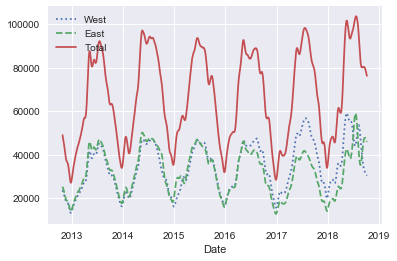

In [6]:
daily = data.resample('D').sum()
daily.rolling(50, center=True,
              win_type='gaussian').sum(std=10).plot(style=[':', '--', '-']);

### 进一步观察按每小时统计的自行车数量
1. 车流量最多的时间集中在8点及17点，这与上下班时间吻合
2. 从东西路口驶入车辆峰值也刚好相反，东口上午高，西口下午高

### 类似的，按星期进一步观察自行车数量
1. 工作日自行车数量较多，周末较少，说明大部分骑车的人都是用来上班的
2. 工作日、周末各时间段驶入自行车数量差异明显

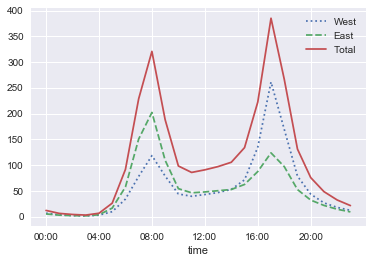

In [7]:
by_hour = data.groupby(data.index.time).mean()
hourly_ticks = 4 * 60 * 60 * np.arange(6)
by_hour.plot(xticks=hourly_ticks, style=[':', '--', '-']);

[Text(0,0,''),
 Text(0,0,'Mon'),
 Text(0,0,'Tues'),
 Text(0,0,'Wed'),
 Text(0,0,'Thurs'),
 Text(0,0,'Fri'),
 Text(0,0,'Sat'),
 Text(0,0,'Sun')]

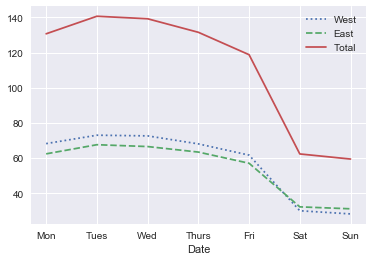

In [8]:
by_weekday = pd.DataFrame(data.groupby(data.index.dayofweek).mean())
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
by_weekday.plot(ax = ax,style=[':', '--', '-'],)
by_weekday.index = ['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun']
ax.set_xticklabels(['','Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun'])

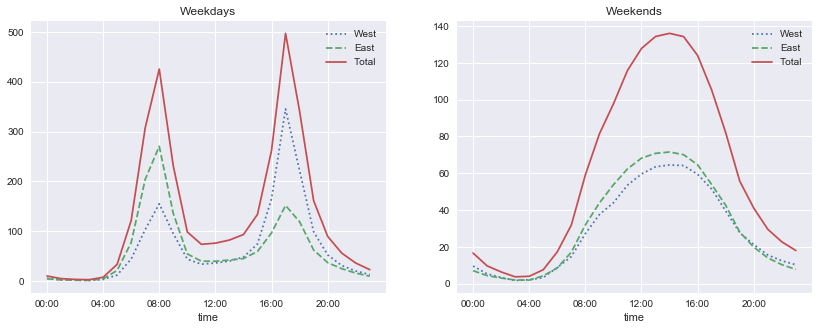

In [9]:
weekend = np.where(data.index.weekday < 5, 'Weekday', 'Weekend')
by_time = data.groupby([weekend, data.index.time]).mean()

fig, ax = plt.subplots(1, 2, figsize=(14, 5))
by_time.loc['Weekday'].plot(ax=ax[0], title='Weekdays',
                           xticks=hourly_ticks, style=[':', '--', '-'])
by_time.loc['Weekend'].plot(ax=ax[1], title='Weekends',
                           xticks=hourly_ticks, style=[':', '--', '-'])

### 导入当地天气数据
1. 导入当地天气数据集,进一步查看天气因素与自行车数量的关系
2. 查看天气信息，可以看到是按日计量，包括了1340条数据，特征包括温度、降雨量等

In [10]:
counts = pd.read_csv('FremontBridge.csv', index_col='Date', parse_dates=True)
weather = pd.read_csv('BicycleWeather.csv', index_col='DATE', parse_dates=True)

In [11]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2250 entries, 2012-10-03 to 2018-11-30
Data columns (total 23 columns):
STATION    2250 non-null object
NAME       2250 non-null object
AWND       2249 non-null float64
PRCP       2250 non-null float64
SNOW       2249 non-null float64
SNWD       2250 non-null float64
TMAX       2250 non-null int64
TMIN       2250 non-null int64
WDF2       2249 non-null float64
WDF5       2229 non-null float64
WSF2       2249 non-null float64
WSF5       2229 non-null float64
WT01       962 non-null float64
WT02       109 non-null float64
WT03       17 non-null float64
WT04       2 non-null float64
WT05       3 non-null float64
WT08       64 non-null float64
WT13       104 non-null float64
WT14       19 non-null float64
WT16       129 non-null float64
WT18       6 non-null float64
WT22       9 non-null float64
dtypes: float64(19), int64(2), object(2)
memory usage: 421.9+ KB


In [12]:
weather 

,STATION,NAME,AWND,PRCP,SNOW,SNWD,TMAX,TMIN,WDF2,WDF5,...,WT02,WT03,WT04,WT05,WT08,WT13,WT14,WT16,WT18,WT22
DATE,,,,,,,,,,,,,,,,,,,,,
2012-10-03,USW00024233,"SEATTLE TACOMA INTERNATIONAL AIRPORT, WA US",16.33,0.00,0.0,0.0,66,46,10.0,20.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-10-04,USW00024233,"SEATTLE TACOMA INTERNATIONAL AIRPORT, WA US",14.54,0.00,0.0,0.0,66,47,20.0,20.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-10-05,USW00024233,"SEATTLE TACOMA INTERNATIONAL AIRPORT, WA US",12.75,0.00,0.0,0.0,71,48,360.0,360.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-10-06,USW00024233,"SEATTLE TACOMA INTERNATIONAL AIRPORT, WA US",11.41,0.00,0.0,0.0,75,46,20.0,20.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-10-07,USW00024233,"SEATTLE TACOMA INTERNATIONAL AIRPORT, WA US",2.91,0.00,0.0,0.0,75,46,30.0,10.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-10-08,USW00024233,"SEATTLE TACOMA INTERNATIONAL AIRPORT, WA US",4.25,0.00,0.0,0.0,70,46,210.0,230.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-10-09,USW00024233,"SEATTLE TACOMA INTERNATIONAL AIRPORT, WA US",3.58,0.00,0.0,0.0,61,48,170.0,170.0,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
2012-10-10,USW00024233,"SEATTLE TACOMA INTERNATIONAL AIRPORT, WA US",3.13,0.00,0.0,0.0,54,47,40.0,40.0,...,1.0,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN
2012-10-11,USW00024233,"SEATTLE TACOMA INTERNATIONAL AIRPORT, WA US",2.91,0.00,0.0,0.0,57,45,270.0,60.0,...,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN


### 特征工程
1. 将温度转化为摄氏度
2. 增加晴雨特征
3. 由于之前可以看出自行车驶入量与年周期相关性很大，增加以年为周期，按日增加的时间特征
4. 冬夏有着不同的日照长短，引入白昼时间特征
5. 节假日车流量不同，引入节假日

(8, 17)

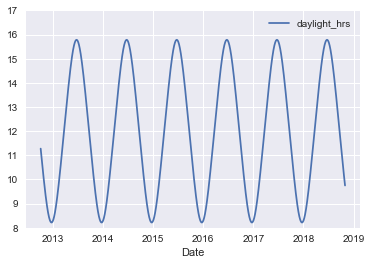

In [24]:
def hours_of_daylight(date, axis=23.44, latitude=47.61):
    days = (date - pd.datetime(2000, 12, 21)).days
    m = (1. - np.tan(np.radians(latitude))
         * np.tan(np.radians(axis) * np.cos(days * 2 * np.pi / 365.25)))
    return 24. * np.degrees(np.arccos(1 - np.clip(m, 0, 2))) / 180.

daily['daylight_hrs'] = list(map(hours_of_daylight, daily.index))
daily[['daylight_hrs']].plot()
plt.ylim(8, 17)

In [15]:
daily = counts.resample('d').sum()
daily['Total'] = daily.sum(axis=1)
daily = daily[['Total']] 
days = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
for i in range(7):
    daily[days[i]] = (daily.index.dayofweek == i).astype(float)

In [16]:
weather['TMIN'] /= 10
weather['TMAX'] /= 10
weather['Temp (C)'] = 0.5 * (weather['TMIN'] + weather['TMAX'])

# precip is in 1/10 mm; convert to inches
weather['PRCP'] /= 254
weather['dry day'] = (weather['PRCP'] == 0).astype(int)

daily = daily.join(weather[['PRCP', 'Temp (C)', 'dry day']])

In [17]:
from pandas.tseries.holiday import USFederalHolidayCalendar
cal = USFederalHolidayCalendar()
holidays = cal.holidays('2012', '2019')
daily = daily.join(pd.Series(1, index=holidays, name='holiday'))
daily['holiday'].fillna(0, inplace=True)

In [18]:
daily['annual'] = (daily.index - daily.index[0]).days / 365

In [25]:
dailyi

,Total,Mon,Tue,Wed,Thu,Fri,Sat,Sun,PRCP,Temp (C),dry day,holiday,annual,daylight_hrs
Date,,,,,,,,,,,,,,
2012-10-03,3521.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.000000,5.60,1,0.0,0.000000,11.277359
2012-10-04,3475.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.000000,5.65,1,0.0,0.002740,11.219142
2012-10-05,3148.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.000000,5.95,1,0.0,0.005479,11.161038
2012-10-06,2006.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.000000,6.05,1,0.0,0.008219,11.103056
2012-10-07,2142.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,6.05,1,0.0,0.010959,11.045208
2012-10-08,3537.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,5.80,1,1.0,0.013699,10.987503
2012-10-09,3501.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.000000,5.45,1,0.0,0.016438,10.929950
2012-10-10,3235.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.000000,5.05,1,0.0,0.019178,10.872560
2012-10-11,3047.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.000000,5.10,1,0.0,0.021918,10.815345


In [26]:
X = daily.drop('Total',axis=1)
y = daily['Total']

### 观察单车驶入量与各特征的关系
1. 强相关的包括日照时间、温度及是否下雨
2. 节假日骑车人数明显减少

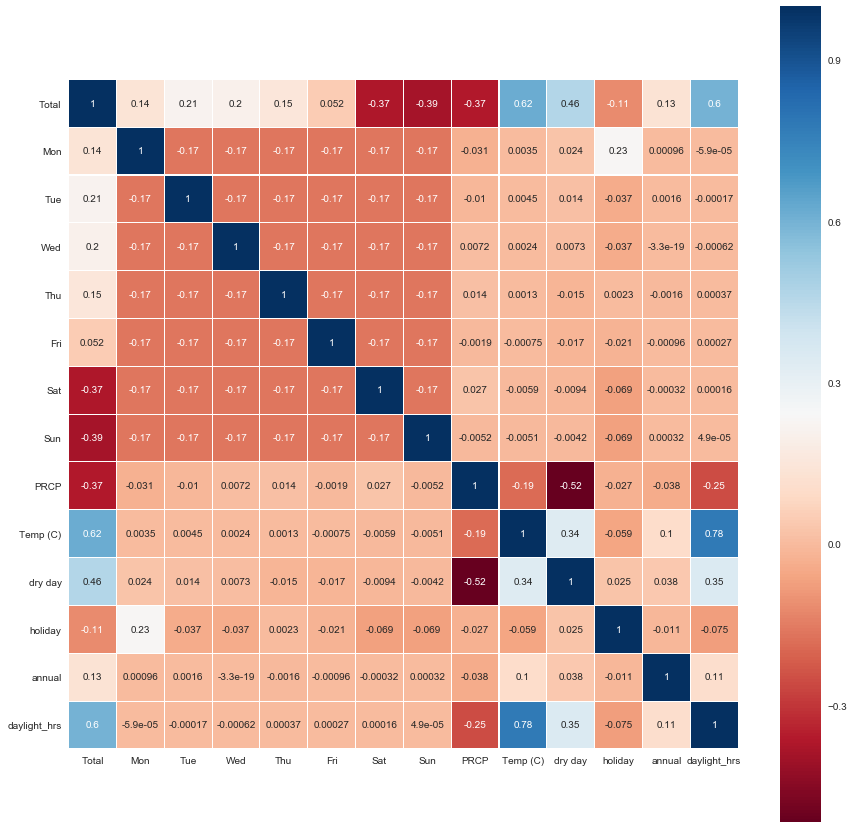

In [31]:
import seaborn as sns
plt.figure(figsize=(15,15))
colormap = plt.cm.RdBu
sns.heatmap(daily.corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)
plt.show()

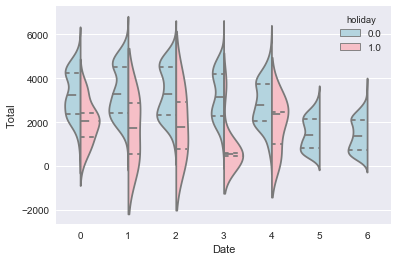

In [120]:
sns.violinplot( "Date",'Total', data=daily,hue='holiday',split=True, inner="quartile",
palette=["lightblue", "lightpink"])


H:\Program\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
H:\Program\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


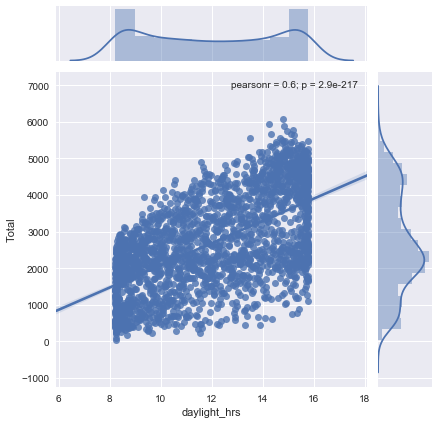

In [95]:
sns.jointplot(y="Total", x="daylight_hrs", data=daily, kind='reg');

### 将数据划分为训练集及测试集

In [21]:
from sklearn.model_selection import train_test_split

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [64]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression(fit_intercept=False)
lm_model = lm.fit(X_train,y_train)

### 使用线性回归及随机森林方法建模，并进行预测
1. 从各时段驶入量趋势看，两种方法与实际相差不大
2. 一些特定时段有非常高/低的峰值，推测可能为节日，此时预测准确率较低
3. 从MSE结果来看，简单的线性回归比随机森林方法模型更正确

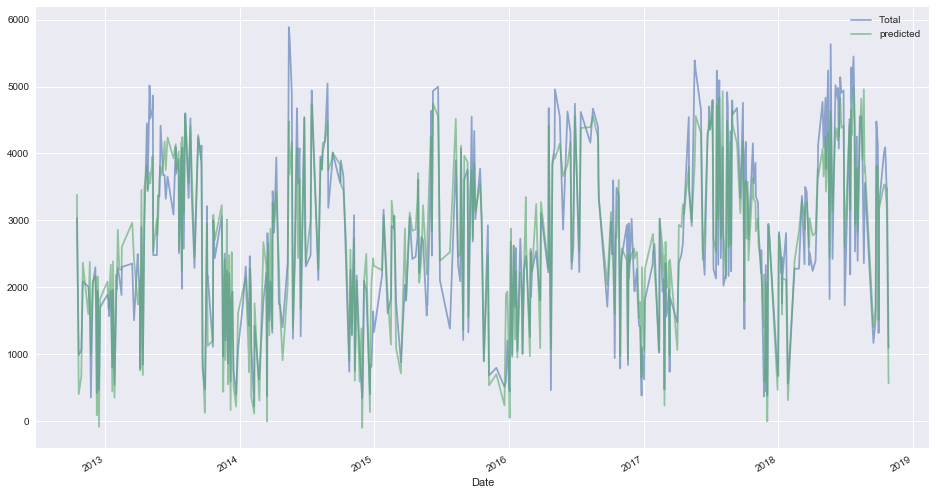

In [65]:
lm_result = pd.DataFrame(y_test)
lm_result['predicted'] = lm.predict(X_test)
lm_result.plot(alpha=0.6,figsize = (16,9))

In [66]:
from sklearn.model_selection import cross_val_score
lm_scores=-cross_val_score(lm,X_test,y_test,cv=5,scoring='neg_mean_squared_error')
np.mean(lm_scores)

243992.2630456299

In [68]:
params = pd.Series(lm_model.coef_, index=X_test.columns)
params

Mon               -592.970878
Tue               -438.119829
Wed               -485.922254
Thu               -641.736931
Fri               -947.139649
Sat              -2318.239760
Sun              -2416.014394
PRCP           -174982.733718
Temp (C)           402.410834
dry day            496.042232
holiday          -1149.523752
annual              43.239776
daylight_hrs       109.316868
dtype: float64

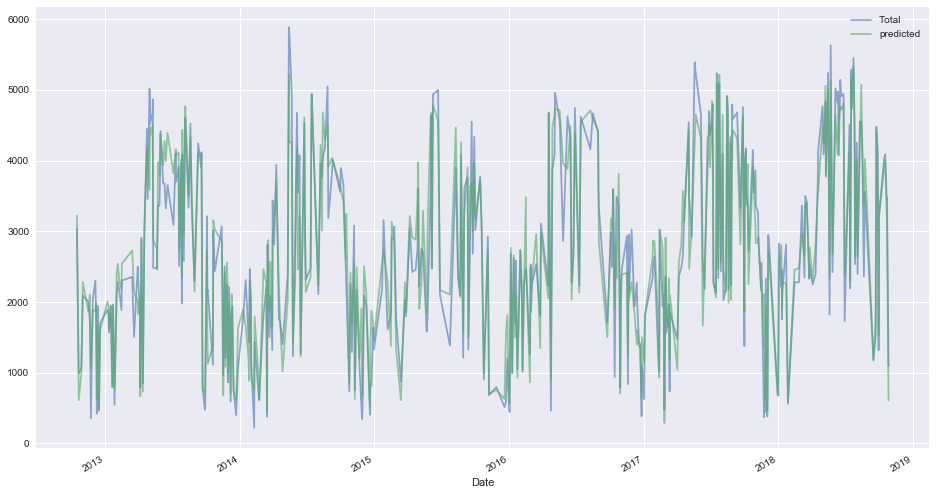

In [67]:
from sklearn.ensemble import RandomForestRegressor
rm=RandomForestRegressor(10)
rm_model=rm.fit(X_train,y_train)
rm_result = pd.DataFrame(y_test)
rm_result['predicted'] = rm.predict(X_test)
rm_result.plot(alpha=0.6,figsize = (16,9))

In [57]:
rm_scores=-cross_val_score(rm,X_test,y_test,cv=5,scoring='neg_mean_squared_error')
np.mean(rm_scores)

268115.57036899903

In [72]:
from sklearn.utils import resample
np.random.seed(1)
err = np.std([model.fit(*resample(X_test,y_test)).coef_
              for i in range(1000)], 0)

### 各特征量误差
1. 星期变量整体比较稳定，工作日骑车人数比周末更多
2. 降雨量数值比较异常
3. 节日特征误差较大，这与上文推断相符

### 可修改空间
1. 天气中还包含了风力等特征，这与降雨量等也是影响自行车量的因素
2. 温度太高/太低都不利于骑车，是一个非线性变量，单用线性拟合太局限
3. 不同节日对人们骑车行为可能有差异，如圣诞节估计更多人愿意呆在家里

In [73]:
print(pd.DataFrame({'effect': params.round(0),
                    'error': err.round(0)}))

                effect    error
Mon             -593.0     53.0
Tue             -438.0     54.0
Wed             -486.0     65.0
Thu             -642.0     51.0
Fri             -947.0     58.0
Sat            -2318.0     58.0
Sun            -2416.0     52.0
PRCP         -174983.0  26935.0
Temp (C)         402.0     40.0
dry day          496.0     52.0
holiday        -1150.0    247.0
annual            43.0     14.0
daylight_hrs     109.0     16.0
